In [1]:
import torch as t
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def pp(*xs, title=None):
    def _single(x, ax):
        x_np = x.cpu().numpy()
        rows, cols = x_np.shape
        ratio = rows / cols
        im = ax.imshow(np.ones_like(x_np), cmap='gray')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        for i in range(rows):
            for j in range(cols):
                text = ax.text(j, i, x_np[i, j], ha="center", va="center", color="white")

    n_xs = len(xs)
    fig, axs = plt.subplots(1, n_xs, figsize=(3 * n_xs, 3))
    if not isinstance(axs, np.ndarray): axs = [axs]
    for x, ax in zip(xs, axs):
        _single(x, ax)
    # fig.tight_layout()
    if title: fig.suptitle(title)
    plt.show()

## Column Linear TP

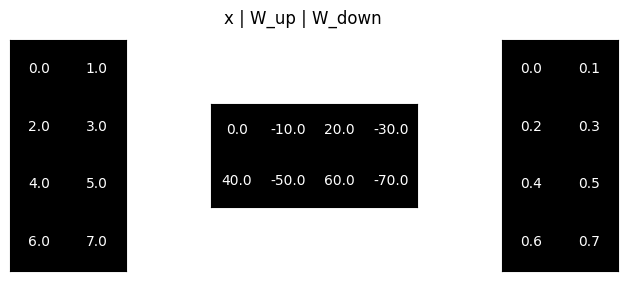

In [3]:
bs = 4
d = 2
d_mult = 2
tp = 2

def relu(x): return t.nn.functional.relu(x)

x = t.arange(bs * d).reshape(bs, d).float()
W_up = t.arange(d * d * d_mult).reshape(d, d * d_mult).float() * 10
W_up = W_up.where(W_up % 20 == 0, -W_up)
W_down = t.arange(d * d * d_mult).reshape(d * d_mult, d).float() * 0.1

pp(x, W_up, W_down, title="x | W_up | W_down")

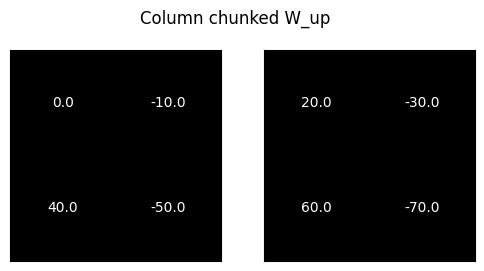

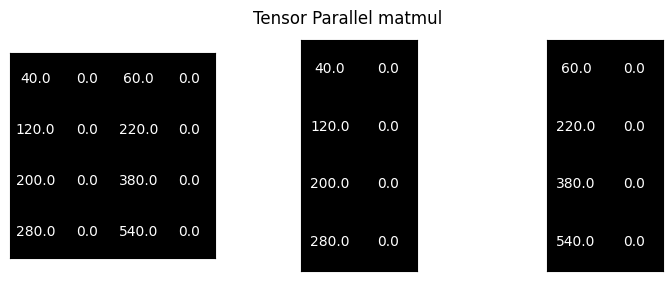

In [4]:
W_up1, W_up2 = W_up.chunk(2, dim=1)
pp(W_up1, W_up2, title="Column chunked W_up")

full_act = relu(x @ W_up)
tp1_act = relu(x @ W_up1)
tp2_act = relu(x @ W_up2)
pp(full_act, tp1_act, tp2_act, title="Tensor Parallel matmul")

## Row Linear TP

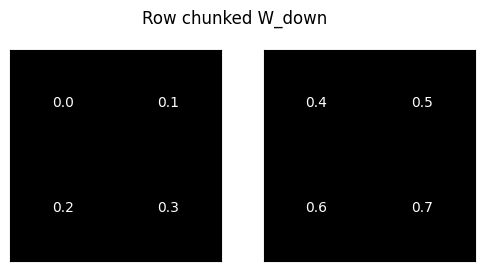

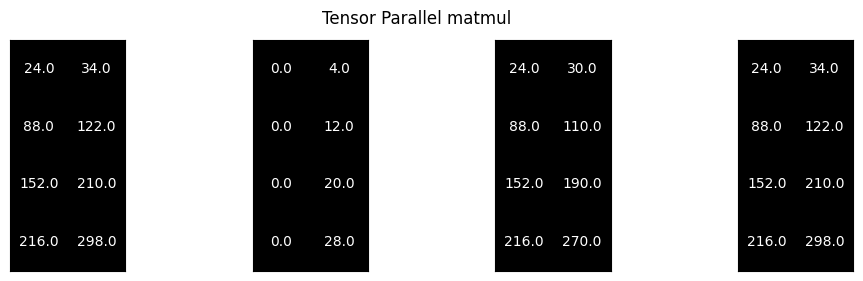

In [5]:
W_down1, W_down2 = W_down.chunk(2, dim=0)
pp(W_down1, W_down2, title="Row chunked W_down")

full_resid = full_act @ W_down
tp1_resid = tp1_act @ W_down1
tp2_resid = tp2_act @ W_down2

tp_all_reduce = tp1_resid + tp2_resid

pp(full_resid, tp1_resid, tp2_resid, tp_all_reduce, title="Tensor Parallel matmul")